In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index=pd.read_csv("economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_index.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

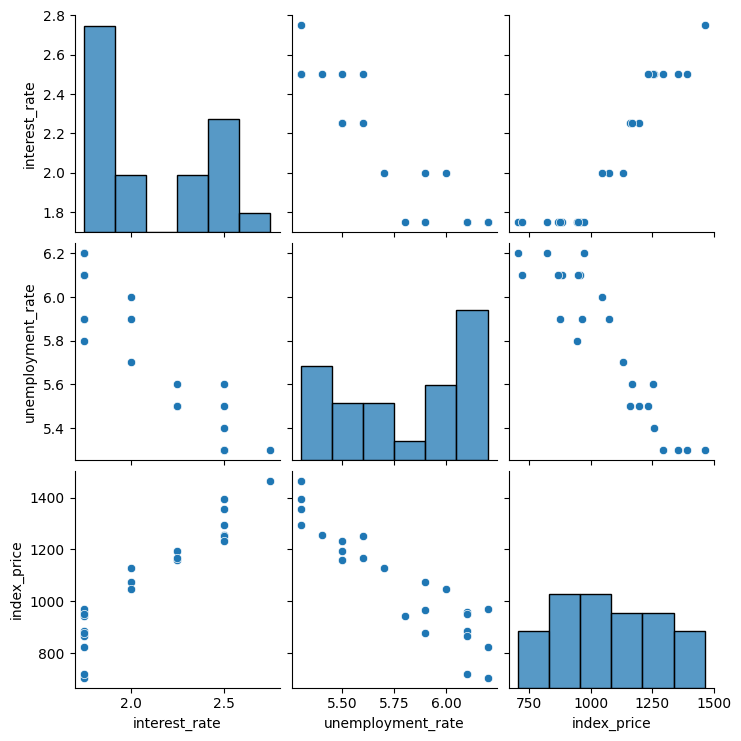

In [8]:
import seaborn as sns
sns.pairplot(df_index);

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


as the interest_rate is increasing then index_price is increaing positive correlation (0.935793)                    
as the unemployment_rate is increasing then index_price is decreaing negative correlation (-0.922338)

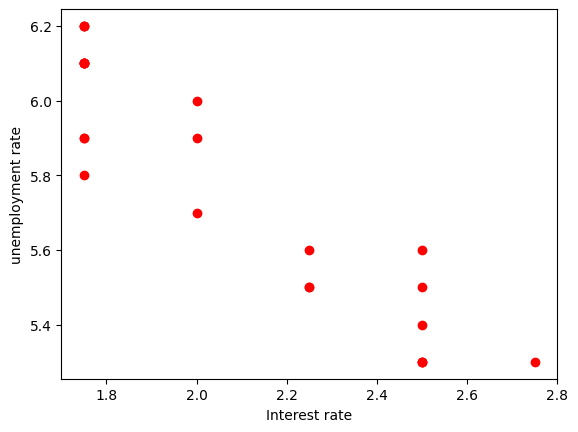

In [11]:
# finding correlation between interest_rate and unemployment_rate
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate");

In [12]:
## independent and dependent features
X=df_index[['interest_rate','unemployment_rate']] ##independent 
y=df_index['index_price'] #dependent
## another way
#X=df_index.iloc[:,:-1]
#y=df_index.iloc[:,-1]

In [13]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [14]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
X.shape ## it should be 2-D as below

(24, 2)

In [16]:
y.shape ## it should be 1-D as below

(24,)

In [17]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=42)

In [18]:
X_train.head()

,interest_rate,unemployment_rate
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1


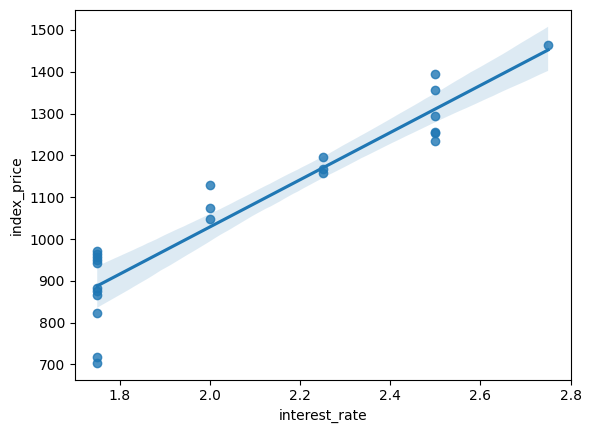

In [19]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df_index);

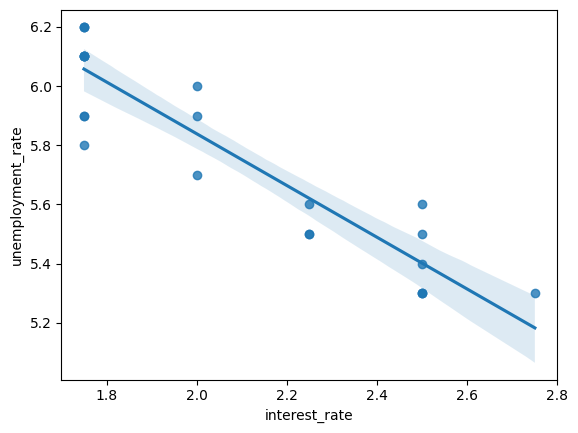

In [20]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index);

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train = scaler.fit_transform(X_train)

# Transform test data without re-fitting
X_test = scaler.transform(X_test)


In [22]:
X_train

array([[-0.89073374,  1.25707872],
       [ 1.35954097, -0.62853936],
       [ 1.35954097, -1.5713484 ],
       [-0.14064217,  0.62853936],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -1.5713484 ],
       [ 1.35954097, -1.25707872],
       [-0.89073374,  1.25707872],
       [-0.89073374,  0.94280904],
       [-0.89073374,  0.31426968],
       [-0.89073374,  0.94280904],
       [ 0.6094494 , -0.94280904],
       [-0.14064217, -0.31426968],
       [-0.89073374,  0.        ],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -0.94280904]])

In [49]:
y_train

21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [57]:
np.mean(validation_score)
# this sholud me negative bcz we have mentioned "vneg_mean_squared_error"

-8584.447029905596

In [63]:
##prediction
y_pred=regression.predict(X_test)

In [65]:
y_pred

array([1192.13083729,  824.23971817, 1400.41971162,  856.16016713,
        992.22505325, 1160.21038833,  920.00106505, 1328.19572341])

In [67]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5088.329958294002
58.95987629034907
71.3325308558024


In [69]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8640024299625206
0.8096034019475289


## Assumption

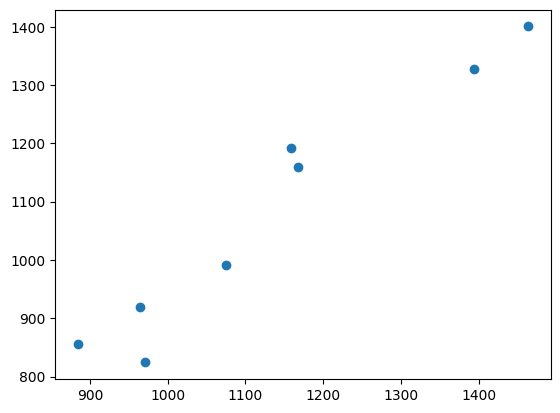

In [104]:
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred);
#if it is a linear relation that means model has performed well

In [106]:
residuals=y_test-y_pred
print(residuals)
## residulas are difference between predicted and actual point

8     -33.130837
16    146.760282
0      63.580288
18     27.839833
11     82.774947
9       6.789612
13     44.998935
1      65.804277
Name: index_price, dtype: float64


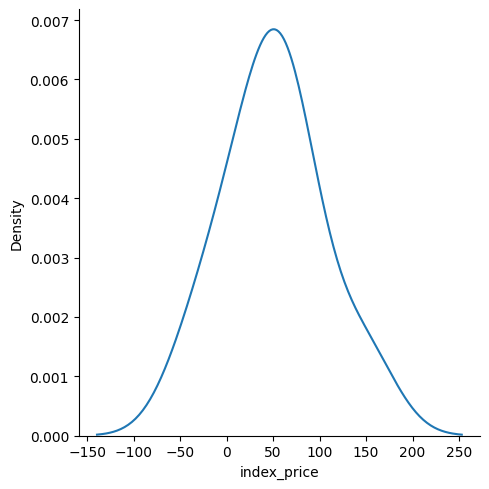

In [108]:
# Plot this residulas
sns.displot(residuals,kind='kde');
# if the plot is like this the model that i have created is good

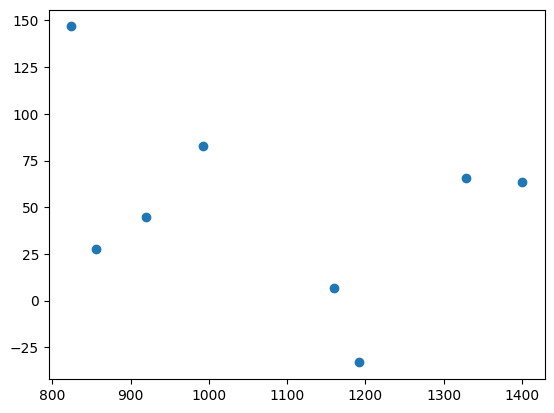

In [127]:
## sctter plot with resspect to prediction and residuals
plt.scatter(y_pred,residuals);
# the data is uniformly distributed then the below graph and our model is correct
# if the data follows some patterns like linear, group, then there is error
# in the below graph data is uniformly distributed then it is correct

In [129]:
import warnings
warnings.filterwarnings("ignore")


In [131]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.105
Method:                 Least Squares   F-statistic:                             0.2425
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                       0.788
Time:                        18:42:55   Log-Likelihood:                         -133.85
No. Observations:                  16   AIC:                                      271.7
Df Residuals:                      14   BIC:                                      273.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            96.2869    682.952      0.141      0.890   -1368.500    1561.074
x2          -101.5702    682.952     -0.149      0.884   -1566.357    1363.216
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.412
Skew:                          -0.327   Prob(JB):                        0.814
Kurtosis:                       2.563   Cond. No.                         4.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
print(regression.coef_)
# same as OLS

[  96.28689501 -101.57024663]
